In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import wind_power_bidding as wpb


In [2]:
# Load the forecast data
with open('InputData/Scenarios.pkl', 'rb') as file:
    data = pickle.load(file)
wind_forecast = data['wind_data_da']
spot_forecast = data['spot_prices']
spot_forecast = np.ones(np.shape(spot_forecast))
imbalance_forecast = data['imbalance']
n1=20; n2=20; n3=20; n_scenarios = [n1,n2,n3]
print(np.shape(wind_forecast))
print(np.shape(spot_forecast))
print(np.shape(imbalance_forecast))

f_up= 1.1 
f_down = 0.9

(24, 20)
(24, 20)
(24, 20)


# Run with the one-price scheme

In [3]:
wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding(wind_forecast[:,:n1], spot_forecast[:,:n2], imbalance_forecast[:,:n3], n_scenarios, f_up, f_down, price_scheme='one_price')

/Users/mjacobs/opt/anaconda3/envs/renewables/lib/python3.12/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


Objective value:  4.684699687009617


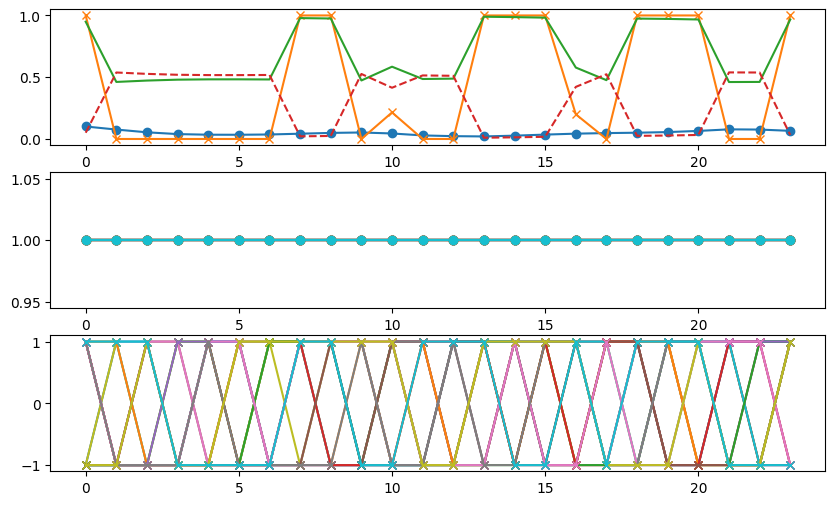

In [4]:
# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1])
plt.plot(imbalances_up[:,:1], '--')
plt.plot()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')


Expected Profit:  4.68469968700964


Text(0.5, 1.0, 'Cumulative Distribution Function of Profit')

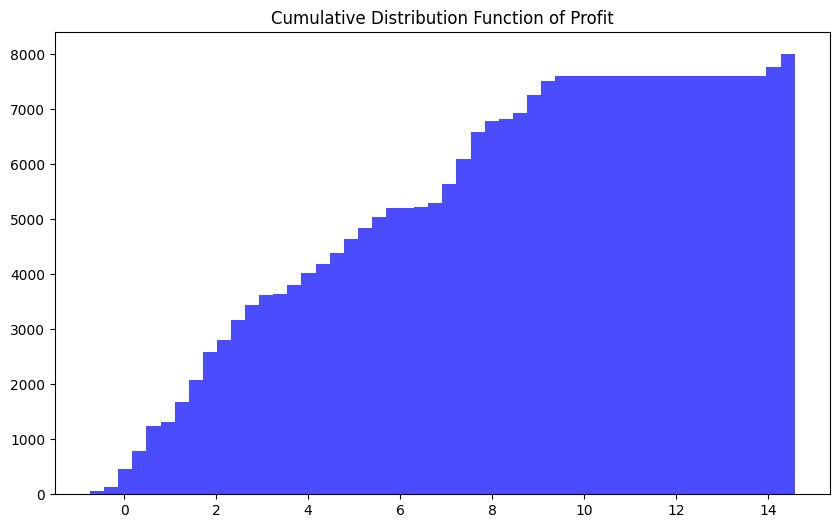

In [5]:
# Compute the profit over all scenarios
profit = np.zeros((n1, n2, n3))
for i in range(n1):
    for j in range(n2):
        for k in range(n3):
            profit[i, j, k] = wpb.compute_profit(wind_bids, wind_forecast[:, i], spot_forecast[:, j], imbalance_forecast[:, k],  f_down, f_up, 'one_price')

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit')

# Run with the two-price scheme

In [6]:
wind_bids, prob, imbalances, imbalances_up, imbalances_down= wpb.wind_pp_bidding(wind_forecast[:,:n1], spot_forecast[:,:n2], imbalance_forecast[:,:n3], n_scenarios, f_up, f_down, price_scheme='two_price')

Objective value:  4.338709309217862


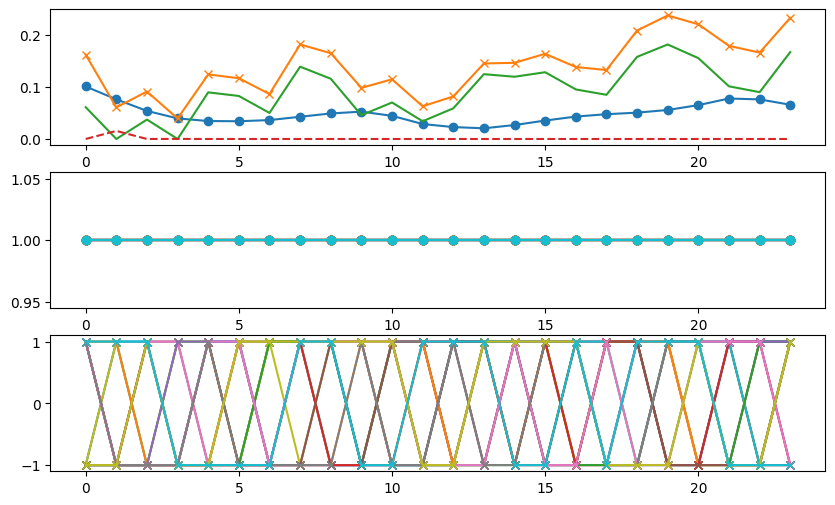

In [7]:
# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:1], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.plot(imbalances_down[:,:1])
plt.plot(imbalances_up[:,:1], '--')
plt.plot()
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,:n3], label='Imbalance Prices', marker='x')

Expected Profit:  4.338709310485832


Text(0.5, 1.0, 'Cumulative Distribution Function of Profit')

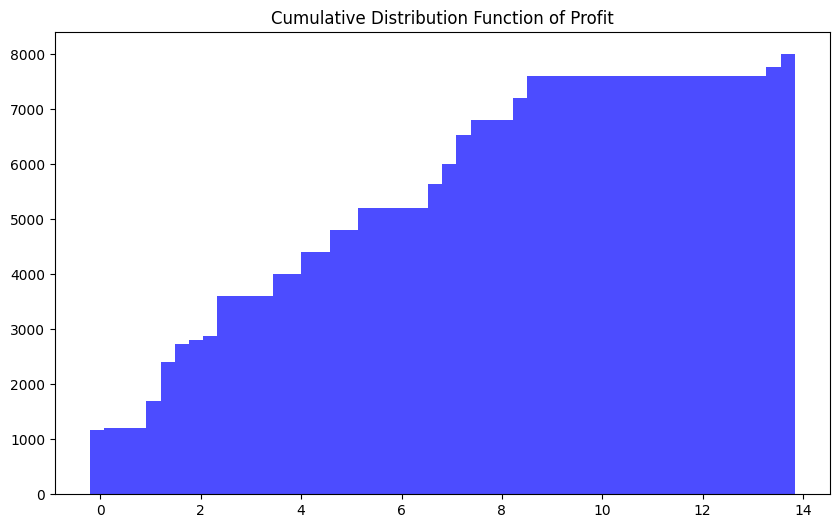

In [8]:
# Compute the profit over all scenarios
profit = np.zeros((n1, n2, n3))
for i in range(n1):
    for j in range(n2):
        for k in range(n3):
            profit[i, j, k] = wpb.compute_profit(wind_bids, wind_forecast[:, i], spot_forecast[:, j], imbalance_forecast[:, k],  f_down, f_up, 'two_price')

# flatten profit array
profit_flat = profit.flatten()
# Sort the profit array
profit_sorted = np.sort(profit_flat)
# Compute the expected profit
expected_profit = np.mean(profit_sorted)
print("Expected Profit: ", expected_profit)
# Visualize the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.hist(profit_sorted, bins=50, cumulative=True, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Profit')